# Step 1:

## Data Loading, Processing and Plotting

We import the packages we are going to use. Each package is a tool within the Python ecosystem that someone has created that allow us to do something new without coding it ourselves (such as image analysis).

In the next example, we are going to load an Excel CSV file and analyse it. So we will need the following packages; Pandas and Numpy.

Pandas is our Dataframe package, numpy is our Numerical Python package

In [1]:
import pandas
import numpy

Example 1: we are going to load a dataframe into python and display it

In [16]:
# Load the csv file

df = pandas.read_csv("Data/Example.csv")

# Show first two rows (Notice the 2)
df.head(2)

# Notice that we didn't create a variable for this operation displaying the first tw rows, so it doesn't exist in our variable explorer.

,Country,Population (Millions)
0,Turkey,84.34
1,Iraq,40.22


In [17]:
# Let's look at variable assignment and displaying the dataframe.

LastTwoRows = df.tail(2)

# This doesn't print as we are assigning a variable. But we can display the variable this way:

print(LastTwoRows)

# Or

LastTwoRows

# Notice the difference in Display

  Country  Population (Millions)
2    Iran                  83.99
3   Syria                  17.50


,Country,Population (Millions)
2,Iran,83.99
3,Syria,17.50


Example 2: We are going to filter a dataframe

In [18]:
# We only want data for Turkey

TurkeyRow = df.loc[df['Country'] == "Turkey"]

# Here we use .loc and filter by the column name 'Country'

TurkeyRow

,Country,Population (Millions)
0,Turkey,84.34


### Lambda Functions

Lambda Functions are functions without a name. It is typically used for row-wise filtering logic. Here we will round the Population column row by row.

In [23]:
# Note we wrote Country differently here, instead of square brackets and quotation marks. We use quotation marks if there is a space in the column name

RoundedCountryPopulation = df['Population (Millions)'].apply(lambda x: round(x,1))

RoundedCountryPopulation

0    84.3
1    40.2
2    84.0
3    17.5
Name: Population (Millions), dtype: float64

Note that in Python, there are many ways of doing things and that it is quicker to round the whole column in one go. In this case as the workload is so small we won't see a difference, unless your computer is quite old:

In [24]:
RoundedCountryPopulation = round(df['Population (Millions)'], 1)

RoundedCountryPopulation

0    84.3
1    40.2
2    84.0
3    17.5
Name: Population (Millions), dtype: float64

### Loops

Loops in python allow us to, like lambda functions, allow us to iterate and repeat an operation on data. Here, we will only round the Population if the country name is Turkey:

In [31]:
# We copy the data so we don't affect the original data
RoundedCountryPopulation = df.copy()

for i in range(0, len(RoundedCountryPopulation)):

    x = RoundedCountryPopulation.Country.loc[i]

    if x == 'Turkey':

        # Print Turkey if the Country is Turkey
        print(x)

        # Round the Value for Turkey's population
        RoundedCountryPopulation.loc[i, 'Population (Millions)'] = round(RoundedCountryPopulation.loc[i, 'Population (Millions)'], 0)

    else:

        # Do nothing for any other country

        pass

print('Population of Turkey has been Rounded to the nearest whole number')

RoundedCountryPopulation

Turkey
Population of Turkey has been Rounded to the nearest whole number


,Country,Population (Millions)
0,Turkey,84.00
1,Iraq,40.22
2,Iran,83.99
3,Syria,17.50


Notice if we write this in the same way as a Lambda Function, it's much more concise:

In [49]:
RoundedCountryPopulation = df[['Country', 'Population (Millions)']].apply(lambda x: round(x['Population (Millions)'],0) if x.Country == 'Turkey' else x['Population (Millions)'], axis=1)

RoundedCountryPopulation

0    84.00
1    40.22
2    83.99
3    17.50
dtype: float64

### Replacing Text

Sometimes with Data you'll need to replace text that is incorrect in the data. Here, we change Iran to Tunisia.

In [50]:
df.Country = df.Country.replace('Iran', 'Tunisia')

df

,Country,Population (Millions)
0,Turkey,84.34
1,Iraq,40.22
2,Tunisia,83.99
3,Syria,17.50


We can replace characters as well, row by row.

In [51]:
# Here we won't assign a variable and go row by row, see the for which represents a loop.

[x.replace("a", '-') for x in df.Country]

['Turkey', 'Ir-q', 'Tunisi-', 'Syri-']

Let's utilize these skills to graph data we've been using.

In [132]:
ForeignMinistryStatements = pandas.read_csv('Data/Turkish Foreign Ministry Statements - Press Releases - KRG.csv')

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Date (mm/dd/yyyy),Title,English Title,Link,Sentiment,Kurds in Turkey,Kurds in Syria,Kurds in Iraq,Kurds in Iran,Turkey's National Security,Independence or Autonomy,PKK/SDF/YPG/YPJ/YBS/QSD,Which group?,ISIS/Daesh,Undefined terrorism or national security threat,Full Text
0,1998-04-01,1/4/1998,Türkiye Dışişleri Bakanı Sayın İsmail Cem'in İ...,Letter sent by Turkish Foreign Minister Mr. İs...,https://www.mfa.gov.tr/letter-sent-by-turkish-...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"Dear Colleague and Friend, \n \n I have receiv..."
1,1998-03-03,3/3/1998,Türk ve Ürdün Tarafları Tarafından Verilen Ort...,Joint Communique Given By Turkish And Jordan S...,https://www.mfa.gov.tr/joint-communique-given-...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"On 26-27 February 1998, His Excellency Mr. Ism..."
2,20/10/1998,10/20/1998,Dışişleri Bakanı İsmail Cem'in Türkiye-Suriye ...,"Statement Made By İsmail Cem, Foreign Minister...",https://www.mfa.gov.tr/_p_statement-made-by-is...,NaN,0,0,0.0,0,0,0.0,1,PKK,0,0.0,"""We will carefully monitor the implementation ..."
3,21/12/1998,12/21/1998,"Türkiye, Irak'a Yönelik ABD-İngiltere Ortak Ha...",Turkey Welcomes The Cessation Of The Joint US-...,https://www.mfa.gov.tr/turkey-welcomes-the-ces...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,Turkey welcomes the cessation on 20 December o...
4,28/12/1998,12/28/1998,Basın Bülteni Irak güçleri ile ABD Uçağı arası...,Press Release Regarding the latest clash betwe...,https://www.mfa.gov.tr/_p_press-release-regard...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"Today, Iraqi forces missiles fired ground-to-a..."


We are going to graph the number of PKK mentions in MFA statements over time. Therefore we only need the date and the 'Which Group' Column.

In [133]:
ForeignMinistryStatements = ForeignMinistryStatements[['Date (dd/mm/yyyy)', 'Which group?']]

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Which group?
0,1998-04-01,0
1,1998-03-03,0
2,20/10/1998,PKK
3,21/12/1998,0
4,28/12/1998,0


For the dates, we need it to be in one common format. We write a filter for both formats, then fill the missing values in the first group with those of the second and use that as the date column

In [134]:
#ForeignMinistryStatements['Date (dd/mm/yyyy)'].replace('-', '/', inplace = True)

Date1 = pandas.to_datetime(ForeignMinistryStatements['Date (dd/mm/yyyy)'], errors='coerce', format='%Y-%m-%d')
Date2 = pandas.to_datetime(ForeignMinistryStatements['Date (dd/mm/yyyy)'], errors='coerce', format='%d/%m/%Y')

ForeignMinistryStatements['Date (dd/mm/yyyy)'] = Date1.fillna(Date2)

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Which group?
0,1998-04-01,0
1,1998-03-03,0
2,1998-10-20,PKK
3,1998-12-21,0
4,1998-12-28,0


Now we only want the data for PKK mentions:

In [135]:
ForeignMinistryStatements = ForeignMinistryStatements[(ForeignMinistryStatements['Which group?'] == 'PKK') | (ForeignMinistryStatements['Which group?'] == 'Pkk') | (ForeignMinistryStatements['Which group?'] == 'pkk')]

ForeignMinistryStatements

,Date (dd/mm/yyyy),Which group?
2,1998-10-20,PKK
5,1999-08-01,PKK
7,1999-01-17,PKK
8,1999-01-19,PKK
9,1999-01-02,PKK
...,...,...
204,2020-03-07,PKK
205,2020-05-07,PKK
208,2020-12-08,PKK
210,2020-10-10,PKK


There are 73 statements. How does this look by year?

In [136]:
ForeignMinistryStatements['Which group?'] = 1

ForeignMinistryStatements.set_index('Date (dd/mm/yyyy)', inplace=True, drop=True)

ForeignMinistryStatements = ForeignMinistryStatements.resample('Y').agg('sum')

ForeignMinistryStatements.head(5)

,Which group?
Date (dd/mm/yyyy),
1998-12-31,1
1999-12-31,11
2000-12-31,0
2001-12-31,1
2002-12-31,0


Let's plot this:

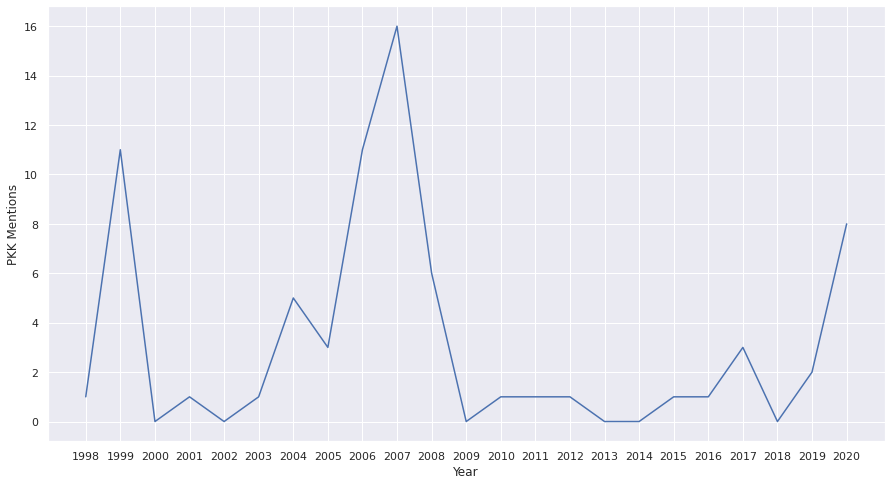

In [175]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Date (dd/mm/yyyy)", y="Which group?", data=ForeignMinistryStatements)

ax.set(xlabel = 'Year', ylabel = 'PKK Mentions')

sns.set(font_scale = 1)

ax.set(xticks=ForeignMinistryStatements.index)
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# Step 2:

## GeoSpatial Data

Python is quite useful for graphing quantitative data as well as geospatial data.

In [13]:
# Let's start by importing some conflict data:

Conflict = pandas.read_csv("Data/IraqConflictData.csv")

Conflict.head(5)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
42876,368,IRQ15174,15174,2016-01-01,2016,1,Battles,Armed clash,Unidentified Armed Group (Iraq),NaN,...,Markaz Al Muqdadiya,Qaryat al Mukhaysah,33.906,44.725,1,National Iraqi News Agency,National,"On Jan 01, 1 soldier was killed by unidentifie...",1,1618557594
42877,368,IRQ15167,15167,2016-01-01,2016,1,Battles,Armed clash,Military Forces of Iraq (2014-2018) Popular Mo...,NaN,...,Al Synia,Baiji,34.929,43.489,2,National Iraqi News Agency,National,"On Jan 01, the PMF repelled an attack by IS mi...",17,1618557593
42878,368,IRQ15168,15168,2016-01-01,2016,1,Battles,Government regains territory,Military Forces of Iraq (2014-2018) Popular Mo...,Global Coalition Against Daesh,...,Markaz Al Falluja,Qaryat al Naimiyah,33.271,43.832,1,Al Maloomah,National,"On Jan 01, the PMF backed by the global coalit...",10,1618557593
42879,368,IRQ15172,15172,2016-01-01,2016,1,Battles,Armed clash,Islamic State (Iraq),NaN,...,Qara Tabe,Qarah Tabah,34.433,44.935,1,Al Maloomah,National,"On Jan 01, IS militants killed a policeman in ...",1,1618557593
42880,368,IRQ15169,15169,2016-01-01,2016,1,Explosions/Remote violence,Shelling/artillery/missile attack,Islamic State (Iraq),NaN,...,Al Amirya,Nahiyat al Amiriyah,33.172,43.860,1,Al Maloomah,National,"On Jan 01, IS militants targeted residential a...",10,1618557593


We want to view the number of protests in Iraq on a map. Let's filter to protests by event type.

In [24]:
#Let's explore the the different event types in this column before we filter:

Conflict["EVENT_TYPE"].unique()

#* We only want Protest Events.

array(['Protests'], dtype=object)

In [21]:
# Maybe we'd want to examine the frequency of each event type:

Conflict["EVENT_TYPE"].value_counts()

Explosions/Remote violence    17263
Battles                        8413
Protests                       4936
Strategic developments         3091
Violence against civilians     2276
Riots                          1074
Name: EVENT_TYPE, dtype: int64

In [25]:
Conflict = Conflict[Conflict["EVENT_TYPE"] == 'Protests']

Conflict.head(5)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
49,368,IRQ6854,6854,2016-01-03,2016,1,Protests,Peaceful protest,Protesters (Iraq),NaN,...,Markaz Al Kut,Kut,32.506,45.825,1,Al Mada,National,"On Jan 03, hundreds of protesters rallied outs...",0,1618559613
94,368,IRQ6871,6871,2016-01-04,2016,1,Protests,Peaceful protest,Protesters (Iraq),NaN,...,Markaz Al Basrah,Basrah,30.533,47.798,1,Press TV; NRT News,National-Regional,"On Jan 04, protesters gathered in Basra to pro...",0,1618559616
95,368,IRQ6872,6872,2016-01-04,2016,1,Protests,Peaceful protest,Protesters (Iraq),NaN,...,Markaz Kerbela,Kerbala,32.598,44.016,1,Press TV; NRT News,National-Regional,"On Jan 04, protesters gathered in Kerbala to p...",0,1618559616
96,368,IRQ6873,6873,2016-01-04,2016,1,Protests,Peaceful protest,Protesters (Iraq),NaN,...,Markaz Al Najaf,Najaf,32.026,44.346,1,Press TV; NRT News,National-Regional,"On Jan 04, protesters gathered in Najaf to pro...",0,1618559616
102,368,IRQ6870,6870,2016-01-04,2016,1,Protests,Peaceful protest,Protesters (Iraq),NaN,...,NaN,Baghdad,33.325,44.421,1,Press TV; NRT News; Iraqi News,National-Regional,"On Jan 04, protesters marched outside the Gree...",0,1618442064


In order to plot these on a map, we would need to import the Geopandas package, a geospatial python package that extends pandas functionality to geospatial data.

In [27]:
import geopandas

Let's also import the boundaries for Iraq's governorates, so we can segregate protest data by governorate. Notice we added a new column 'Governorate Number'. We will use this as the ID number for the Governorates as the data did not come with Governorate Names.

In [63]:
# We got this data from: https://data.humdata.org/dataset/cod-ab-irq?

# UN e.t.c have lots of data, particularly for Iraq. See what you can find.

Iraq = geopandas.read_file("Map/iraq_governates.shp")

Iraq['Governorate Number'] = numpy.arange(len(Iraq))

Iraq.head(10)

,geometry,Governorate Number
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0
1,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",1
2,"POLYGON ((45.24242 31.74129, 45.24884 31.74048...",2
3,"POLYGON ((44.34425 32.31681, 44.34995 32.30601...",3
4,"POLYGON ((45.26993 32.35793, 45.27767 32.35674...",4
5,"POLYGON ((45.09023 36.44960, 45.09166 36.44032...",5
6,"POLYGON ((44.17148 32.99686, 44.17383 32.99275...",6
7,"POLYGON ((44.41936 33.71985, 44.42863 33.71357...",7
8,"POLYGON ((45.78010 34.83632, 45.77224 34.82990...",8
9,"POLYGON ((42.84654 37.34800, 42.85154 37.34657...",9


Let's plot this:

(38.30338826380006, 49.115242904200045, 28.65414008565007, 37.792650859350076)

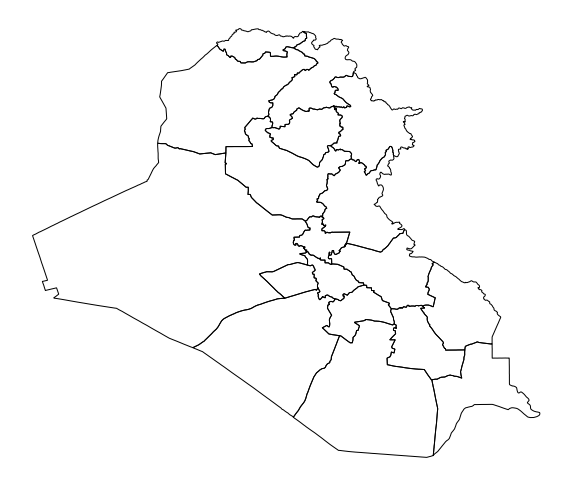

In [37]:
ax = Iraq.plot(figsize = (10,10), facecolor = 'none')
ax.axis('off')

Now that we have the different governorates, we can assign data to them using geopandas functionality:

In [47]:
Conflict.columns

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

In [48]:
# First, we must ensure they use the same coordinate system. In both cases the data uses WGS 84 so we are fine.

# We are going to join the two datasets. We are going to join them as geodataframes, so we have to convert the conflict data into a geodataframe.

# For the Conflict Data, we do not need all the columns either.

ConflictGeoDataFrame = geopandas.GeoDataFrame(Conflict[['EVENT_DATE', 'YEAR', 'ACTOR1', 'ACTOR2', 'ADMIN3', 'LOCATION', 'LONGITUDE', 'LATITUDE','FATALITIES', 'NOTES']], geometry=geopandas.points_from_xy(Conflict['LONGITUDE'], Conflict['LATITUDE']))

ConflictGeoDataFrame.head(5)

#Iraq.sjoin(Conflict, how="left")

,EVENT_DATE,YEAR,ACTOR1,ACTOR2,ADMIN3,LOCATION,LONGITUDE,LATITUDE,FATALITIES,NOTES,geometry
49,2016-01-03,2016,Protesters (Iraq),NaN,Markaz Al Kut,Kut,45.825,32.506,0,"On Jan 03, hundreds of protesters rallied outs...",POINT (45.82500 32.50600)
94,2016-01-04,2016,Protesters (Iraq),NaN,Markaz Al Basrah,Basrah,47.798,30.533,0,"On Jan 04, protesters gathered in Basra to pro...",POINT (47.79800 30.53300)
95,2016-01-04,2016,Protesters (Iraq),NaN,Markaz Kerbela,Kerbala,44.016,32.598,0,"On Jan 04, protesters gathered in Kerbala to p...",POINT (44.01600 32.59800)
96,2016-01-04,2016,Protesters (Iraq),NaN,Markaz Al Najaf,Najaf,44.346,32.026,0,"On Jan 04, protesters gathered in Najaf to pro...",POINT (44.34600 32.02600)
102,2016-01-04,2016,Protesters (Iraq),NaN,NaN,Baghdad,44.421,33.325,0,"On Jan 04, protesters marched outside the Gree...",POINT (44.42100 33.32500)


Notice that converting the dataframe to a geodataframe, using longitude and latitude, we create a new column called geometry. We can drop the longtiude and latitude columns now.

In [49]:
ConflictGeoDataFrame.drop(columns=['LONGITUDE', 'LATITUDE'], inplace=True)

ConflictGeoDataFrame.head(1)

Now we can focus on joining the data, to get number of protests by governorate:

In [73]:
Protests = Iraq.sjoin(ConflictGeoDataFrame, how = 'inner')

Protests.head(5)

,geometry,Governorate Number,index_right,EVENT_DATE,YEAR,ACTOR1,ACTOR2,ADMIN3,LOCATION,FATALITIES,NOTES
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0,35968,2022-02-01,2022,Protesters (Iraq),NaN,Markaz Al Ramadi,Ramadi,0,"On 1 February 2022, dozens protested in front ..."
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0,20798,2019-08-24,2019,Protesters (Iraq),NaN,Markaz Al Ramadi,Ramadi,0,"On 24 August 2019, dozens of residents of Kasi..."
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0,22842,2020-01-14,2020,Protesters (Iraq),NaN,Al Garma,Karma,0,"On 14 January 2020, a big number of student pr..."
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0,6939,2016-08-28,2016,Protesters (Iraq),NaN,Al Baghdady,Al Baghdadi,0,"On 28 August 2016, tens of residents of al Bag..."
1,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",1,35714,2022-01-12,2022,Protesters (Iraq),NaN,Al Thagar,Majnoon Oil Field,0,"On 12 January 2022, engineering graduates prot..."


We can plot this as chloropleth map, with colour denoting the number of protests by governorate over the entire time period. To do this, we simply add a new column which equals '1', which we can aggregate as a sum by the column geometry.

In [ ]:
Protests.columns

In [76]:
Protests['Number of Protests'] = 1

Protests = Protests[['geometry', 'Governorate Number', 'Number of Protests']]

# Create a new list of values:
IraqProtests = Protests.groupby('Governorate Number')['Number of Protests'].agg('sum')

IraqProtests

Governorate Number
0       4
1     962
2     551
3     117
4     431
5     370
6     100
7     478
8     131
9      30
10    159
11    117
12     83
13    251
14     89
15     20
16    720
17    319
Name: Number of Protests, dtype: int64

Now we can merge the aggregated protest data with our Governarate data.

In [77]:
Iraq['Number of Protests'] = IraqProtests
Iraq

,geometry,Governorate Number,Number of Protests
0,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",0,4
1,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",1,962
2,"POLYGON ((45.24242 31.74129, 45.24884 31.74048...",2,551
3,"POLYGON ((44.34425 32.31681, 44.34995 32.30601...",3,117
4,"POLYGON ((45.26993 32.35793, 45.27767 32.35674...",4,431
5,"POLYGON ((45.09023 36.44960, 45.09166 36.44032...",5,370
6,"POLYGON ((44.17148 32.99686, 44.17383 32.99275...",6,100
7,"POLYGON ((44.41936 33.71985, 44.42863 33.71357...",7,478
8,"POLYGON ((45.78010 34.83632, 45.77224 34.82990...",8,131
9,"POLYGON ((42.84654 37.34800, 42.85154 37.34657...",9,30


(38.30338826380006, 49.115242904200045, 28.65414008565007, 37.792650859350076)

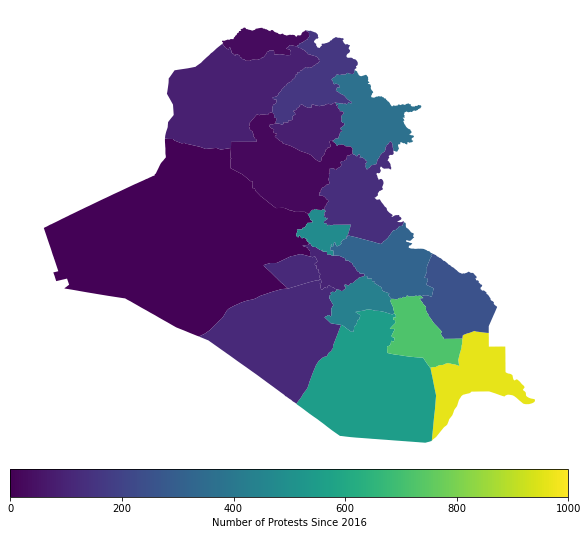

In [113]:
ax = Iraq.plot(column='Number of Protests', cmap = 'viridis', legend=True, figsize=(10,10),legend_kwds={'label': "Number of Protests Since 2016",'orientation': "horizontal", "pad": 0.01}, vmin=0, vmax=1000);

ax.axis('off')

We can add the location of the protests as well, in combining data in one plot.

(38.30338826380006, 49.115242904200045, 28.65414008565007, 37.792650859350076)

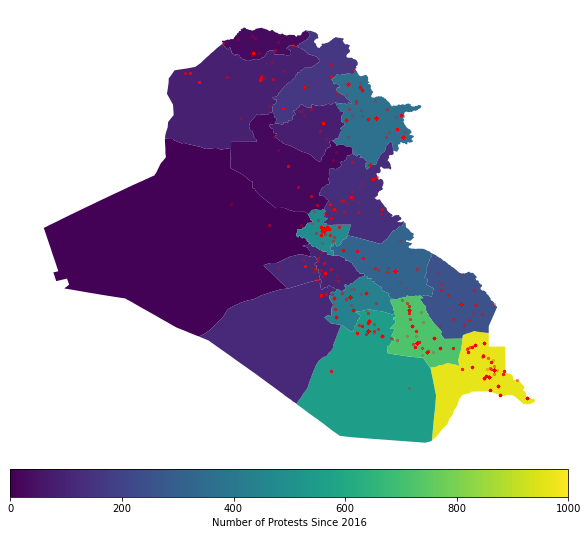

In [118]:
ax = Iraq.plot(column='Number of Protests', cmap = 'viridis', legend=True, figsize=(10,10),legend_kwds={'label': "Number of Protests Since 2016",'orientation': "horizontal", "pad": 0.01}, vmin=0, vmax=1000);

ConflictGeoDataFrame.plot(color='r', alpha=0.2, markersize = 5, ax=ax)

ax.axis('off')